# Stock Price Predictions using RNN

### Loading Stock data

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
import tensorflow as tf

price = pd.read_csv('FB-stock-prices.csv')

print('\nDataSet DataTypes:\n-----------------\n',price.dtypes)
price.head()


DataSet DataTypes:
-----------------
 Date     object
Price     int64
dtype: object


,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [318]:
price['Date'] = pd.to_datetime(price['Date'])

### Daily Stock Price

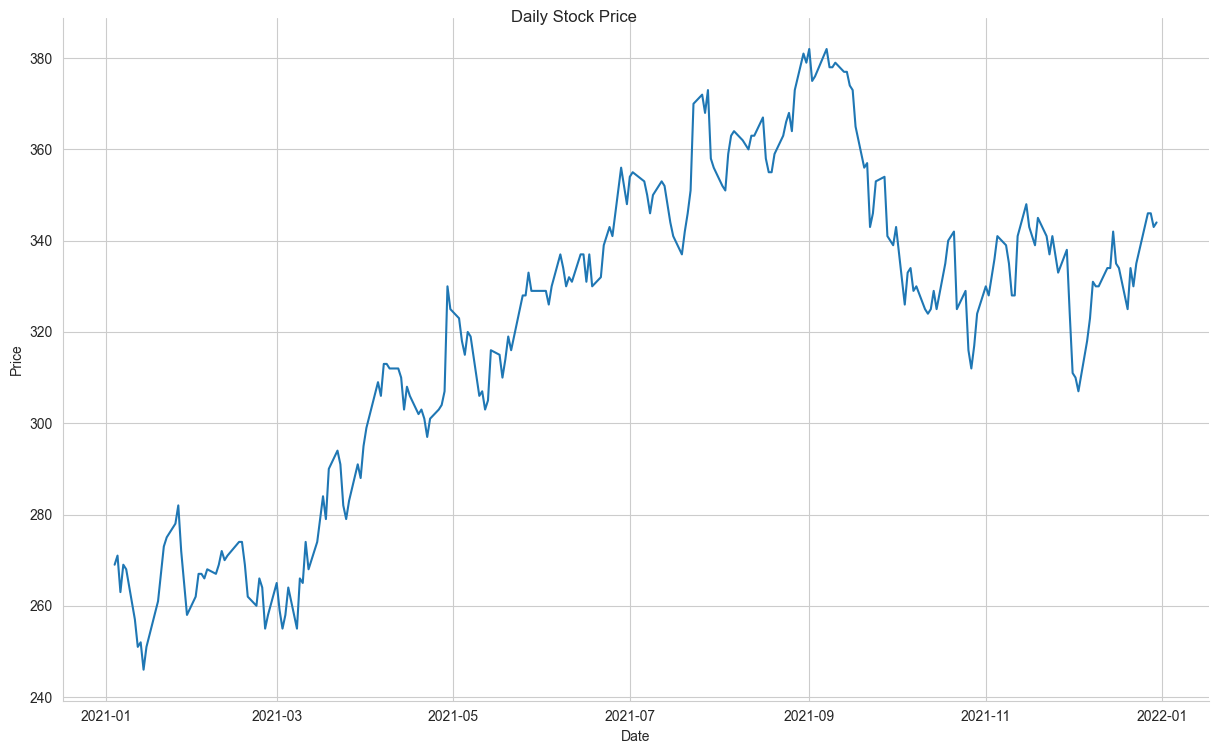

In [319]:
import seaborn as sns
sns.set_style('whitegrid')
daily_price = sns.relplot(data = price,
            x = 'Date',
            y = 'Price',
            kind = 'line')
daily_price.fig.suptitle("Daily Stock Price")
daily_price.fig.set_size_inches(14, 8)
plt.show()


### Price Distribution

<Axes: >

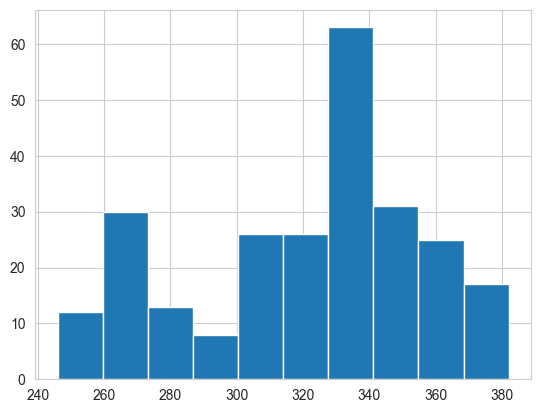

In [320]:
price['Price'].hist()

### Scaling the Data

In [321]:
from sklearn.preprocessing import StandardScaler

# Scale the Data
scaler = StandardScaler()
scaled_prices=scaler.fit_transform(price[["Price"]].values)
scaled_prices = pd.DataFrame(scaled_prices)

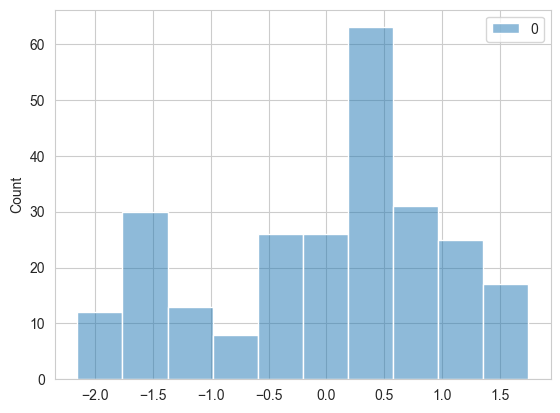

In [322]:
sns.histplot(scaled_prices)
plt.show()

### Data Set Split 

In [323]:
#Split data into Training and Test sets
total_size = len(price)

#Test dataset size
test_size = 50

#Training dataset size
train_size = total_size - test_size
print(train_size, test_size)

training_prices = scaled_prices.iloc[0:train_size,:]
test_prices = scaled_prices.iloc[train_size:,:]

print(training_prices.shape, test_prices.shape)

201 50
(201, 1) (50, 1)


### Function to create look back samples

In [324]:
def create_feature1(df,lookback):
    for i in range(lookback):
        df[i+2] =  df[1].shift(-(i+1))
    return df

### Preprocessing data for RNN

In [325]:
training_prices = pd.DataFrame(training_prices)
training_prices.columns = [1]
lookback = 25
df2 = create_feature1(training_prices,lookback)
df2 = df2.dropna()
X_train = df2.iloc[:,0:(lookback)]
y_train = df2.iloc[:,-1]
# Reshape X to be (samples, timesteps, features)

X_train = X_train.to_numpy()
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # 1 timestep

# Convert y to numpy array
y_train = np.array(y_train)

### RNN Model Building


In [326]:

tf.random.set_seed(3)

#Create a Keras Model
price_model=Sequential()
#Add Simple RNN layer with 32 nodes
price_model.add(SimpleRNN(64, input_shape=(1,lookback)))
#Add a Dense layer at the end for output
price_model.add(Dense(1))


#Compile with Adam Optimizer. Optimize for minimum mean square error
price_model.compile(loss="mean_squared_error",
                 optimizer='adam',
                 metrics=["mse"])

#Print model summary
price_model.summary()

#Train the model
price_model.fit(X_train, y_train, 
             epochs=5, batch_size=1, verbose=1)

c:\Users\Karthi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_40 (SimpleRNN)       │ (None, 64)             │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0088 - mse: 1.0088
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1074 - mse: 0.1074
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0691 - mse: 0.0691
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0558 - mse: 0.0558
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0485 - mse: 0.0485


### Test the Model

In [327]:
test_prices.columns = [1]
test_df = create_feature1(test_prices,lookback)
test_df = test_df.dropna()
X_test = test_df.iloc[:,0:(lookback)]
y_test = test_df.iloc[:,-1]
X_test = X_test.to_numpy()
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # 1 timestep
# Convert y to numpy array
y_test = np.array(y_test)
#Evaluate the model
price_model.evaluate(X_test, y_test, verbose=1)

#Predict on the test dataset
predict_on_test = price_model.predict(X_test)

#Inverse the scaling to view results
predict_on_test = scaler.inverse_transform(predict_on_test)


C:\Users\Karthi\AppData\Local\Temp\ipykernel_25432\460725586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i+2] =  df[1].shift(-(i+1))
C:\Users\Karthi\AppData\Local\Temp\ipykernel_25432\460725586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i+2] =  df[1].shift(-(i+1))
C:\Users\Karthi\AppData\Local\Temp\ipykernel_25432\460725586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.0782 - mse: 0.0782
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


### Actual Vs Predicted Stock Prices

In [328]:
price_predict = price.iloc[train_size+len(predict_on_test):,:].reset_index()
price_predict['predicted'] = pd.DataFrame(predict_on_test)
price_predict

,index,Date,Price,predicted
0,226,2021-11-24,341,340.587250
1,227,2021-11-26,333,342.185486
2,228,2021-11-29,338,337.061310
3,229,2021-11-30,324,338.772797
4,230,2021-12-01,311,329.520538
5,231,2021-12-02,310,326.401184
6,232,2021-12-03,307,318.239319
7,233,2021-12-06,318,306.015411
8,234,2021-12-07,323,319.431732
9,235,2021-12-08,331,320.446350


In [329]:
df_plot = price_predict.melt(id_vars= ['Date'],value_vars =['Price','predicted'])
df_plot['Date'] =pd.to_datetime(df_plot['Date']) 

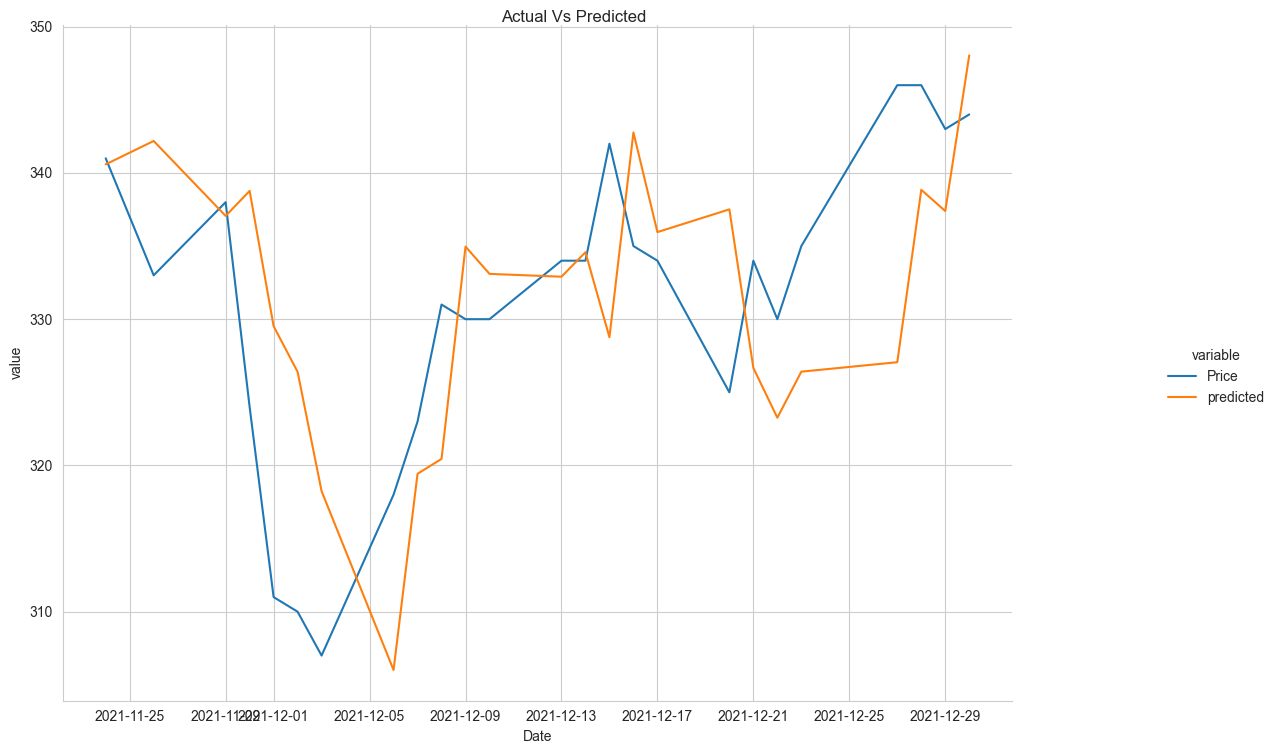

In [330]:
sns.set_style('whitegrid')
df = sns.relplot(data = df_plot,
            x = 'Date',
            y= 'value',
            hue = 'variable',
            kind = 'line')
df.fig.suptitle("Actual Vs Predicted")
df.fig.set_size_inches(14, 8)
plt.show()